In [64]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_curve, auc, precision_recall_curve
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [65]:
url_list = [
    "https://en.wikipedia.org/wiki/Tesla,_Inc.",
    "https://en.wikipedia.org/wiki/Battery_electric_vehicle",
    "https://en.wikipedia.org/wiki/Elon_Musk",
    "https://en.wikipedia.org/wiki/Tesla_Model_S",
    "https://en.wikipedia.org/wiki/Energy_storage",
    "https://en.wikipedia.org/wiki/Tesla_Automation",
    "https://en.wikipedia.org/wiki/Main_Page",
    "https://en.wikipedia.org/w/index.php?title=Special:CreateAccount&returnto=Main+Page",
    "https://donate.wikimedia.org/w/index.php?title=Special:LandingPage&country=US&uselang=en&wmf_medium=sidebar&wmf_source=donate&wmf_campaign=C13_en.wikipedia.org",
    "https://en.wikipedia.org/wiki/Help:Contents",
    "https://wikimediafoundation.org"
]

labels = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}

In [66]:
html_contents = []
graph = nx.DiGraph()

for i, url in enumerate(url_list):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        html_contents.append(soup.get_text())
        graph.add_node(i + 1)
        
        for link in soup.find_all('a', href=True):
            link_url = link['href']
            if link_url.startswith("/wiki/") and not link_url.startswith("/wiki/Special:"):
                target_url = "https://en.wikipedia.org" + link_url
                if target_url in url_list:
                    print(target_url)
                    target_index = url_list.index(target_url) + 1
                    graph.add_edge(i + 1, target_index)
    
    except Exception as e:
        html_contents.append("")
        print(f"Failed to fetch {url}: {e}")

print(html_contents)

https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Help:Contents
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Tesla,_Inc.
https://en.wikipedia.org/wiki/Tesla,_Inc.
https://en.wikipedia.org/wiki/Tesla,_Inc.
https://en.wikipedia.org/wiki/Elon_Musk
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Tesla_Automation
https://en.wikipedia.org/wiki/Elon_Musk
https://en.wikipedia.org/wiki/Elon_Musk
https://en.wikipedia.org/wiki/Battery_electric_vehicle
https://en.wikipedia.org/wiki/Energy_storage
https://en.wikipedia.org/wiki/Elon_Musk
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Elon_Musk
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Tesla_Model_S
https://en.wikipedia.org/wiki/Tesla_Automation
https://en.wikipedia.org/wiki/Battery_electric_vehicle
https://en.wikipedia.org/wiki/Elon_Mu

In [67]:
pagerank_scores = nx.pagerank(graph)
hits_scores = nx.hits(graph)[0]

In [68]:
relevant_words = ['tesla', 'electric', 'vehicle', 'elon', 'musk', 'battery']

# refer to this link : https://stackoverflow.com/questions/46118910/scikit-learn-vectorizer-max-features
#vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
vectorizer = TfidfVectorizer(vocabulary=relevant_words, stop_words='english')

tfidf_matrix = vectorizer.fit_transform(html_contents).toarray()

print(tfidf_matrix)

[[0.96121543 0.08281527 0.07630171 0.12591649 0.20167112 0.08281527]
 [0.01858929 0.89600365 0.34204289 0.         0.         0.28255717]
 [0.15433335 0.01205729 0.0080382  0.46604327 0.87106759 0.0040191 ]
 [0.96876053 0.15241832 0.10075109 0.03126331 0.07389509 0.1472516 ]
 [0.0746658  0.55999348 0.16177589 0.01369076 0.01369076 0.80887947]
 [0.98326726 0.04573336 0.02286668 0.07547123 0.15094247 0.04573336]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


In [69]:
'''
data = []
for i in range(len(url_list)):
    page_id = i + 1
    data.append([
        labels[page_id],
        pagerank_scores.get(page_id, 0),
        hits_scores.get(page_id, 0),
        np.mean(tfidf_matrix[i]) 
    ])

columns = ['Relevant', 'PageRankScore', 'HITSScore', 'TFIDFScore']
df = pd.DataFrame(data, columns=columns)

X = df[['PageRankScore', 'HITSScore', 'TFIDFScore']]
y = df['Relevant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

'''


"\ndata = []\nfor i in range(len(url_list)):\n    page_id = i + 1\n    data.append([\n        labels[page_id],\n        pagerank_scores.get(page_id, 0),\n        hits_scores.get(page_id, 0),\n        np.mean(tfidf_matrix[i]) \n    ])\n\ncolumns = ['Relevant', 'PageRankScore', 'HITSScore', 'TFIDFScore']\ndf = pd.DataFrame(data, columns=columns)\n\nX = df[['PageRankScore', 'HITSScore', 'TFIDFScore']]\ny = df['Relevant']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)\n\n"

In [70]:
columns = ['Relevant', 'PageRankScore', 'HITSScore'] + relevant_words
data = []
for i in range(len(url_list)):
    page_id = i + 1
    features = [
        labels[page_id],
        pagerank_scores.get(page_id, 0),
        hits_scores.get(page_id, 0),
    ] + tfidf_matrix[i].tolist()
    data.append(features)
df = pd.DataFrame(data, columns=columns)



In [71]:
X = df[['PageRankScore', 'HITSScore'] + relevant_words]
y = df['Relevant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

In [74]:
print(y_test_prob)

[0.54089109 0.60425621 0.40819971 0.40819971 0.46953323]


In [75]:
training_precision, training_recall, training_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')

print("Training Result:")
print("Train Precision : ", training_precision)
print("Train Recall", training_recall)
print("Train F1", training_f1_score)


Training Result:
Train Precision :  1.0
Train Recall 1.0
Train F1 1.0


In [76]:

testing_precision, testing_recall, testing_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')


print("Testing Result:")
print("Testing Precision", testing_precision)
print("Testing Recall", testing_recall)
print("Testing F1 Score", testing_f1_score)

Testing Result:
Testing Precision 1.0
Testing Recall 0.6666666666666666
Testing F1 Score 0.8


In [77]:
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy", training_accuracy)

testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: ", testing_accuracy)


Training Accuracy 1.0
Testing Accuracy:  0.8


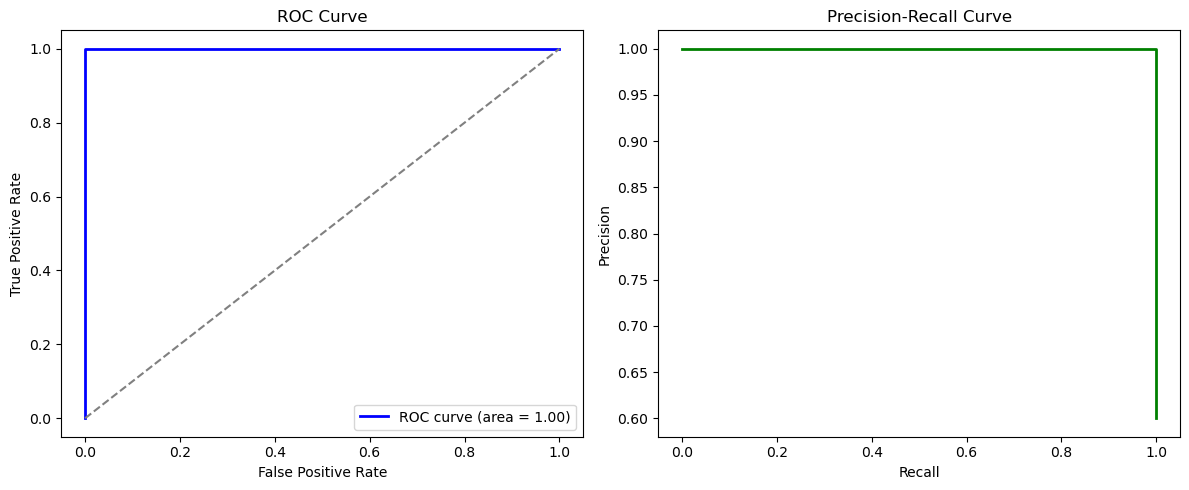

In [78]:
#refer to this link : https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

#refer to this link : https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.precision_recall_curve.html
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()
